### Columns description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading dataset

In [2]:
train=pd.read_csv(r'D:\Downloads\CUSTOMER SEGMENTATIOn\train.csv')
test=pd.read_csv(r'D:\Downloads\CUSTOMER SEGMENTATIOn\test.csv')
sample=pd.read_csv(r'D:\Downloads\CUSTOMER SEGMENTATIOn\sample.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Preliminary EDA to check common IDS in train and test set.
And found that lots of ID in testset common to training set,this is the indication of duplicates of trainingset in testset.

In [3]:
train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [4]:
len(set(test.ID)-set(train.ID)),test.shape #295 test case contains the new values.

(295, (2627, 10))

In [5]:
np.intersect1d(train.ID,test.ID)

array([458989, 458994, 458996, ..., 467954, 467958, 467961], dtype=int64)

In [6]:
train.loc[train.ID==458996]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
7523,458996,Female,Yes,71,No,NaN,1.0,Low,1.0,Cat_6,A


In [7]:
test.loc[test.ID==458996]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6


In [8]:
train.describe(exclude='number')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [9]:
train.Segmentation.value_counts()/len(train)*100 #Balanced

D    28.111056
A    24.442241
C    24.417452
B    23.029251
Name: Segmentation, dtype: float64

## Dealing with missing values

In [10]:
train.isnull().sum() ##for the shake of simplicity fill by convention.

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

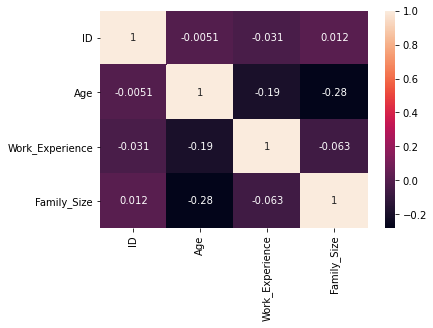

In [11]:
sns.heatmap(train.corr(),annot=True)

In [12]:
#Filled based on intution
train.Graduated.fillna('No',inplace=True)
train.Profession.fillna('unk',inplace=True)#unk means unknown.
train.Work_Experience.fillna(0,inplace=True)
train.Family_Size.fillna(5,inplace=True)
train.Var_1.fillna('unk',inplace=True)

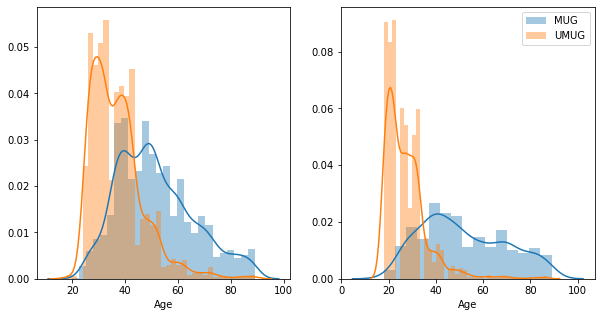

In [13]:
_,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

sns.distplot(train.loc[(train.Ever_Married=='Yes')&(train.Graduated=='Yes'),'Age'],label='MG',ax=ax1)
sns.distplot(train.loc[(train.Ever_Married=='No')&(train.Graduated=='Yes'),'Age'],label='UMG',ax=ax1)

sns.distplot(train.loc[(train.Ever_Married=='Yes')&(train.Graduated=='No'),'Age'],label='MUG',ax=ax2)
sns.distplot(train.loc[(train.Ever_Married=='No')&(train.Graduated=='No'),'Age'],label='UMUG',ax=ax2)
plt.legend()

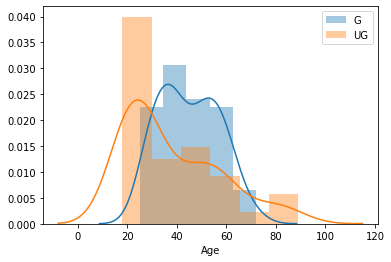

In [14]:
sns.distplot(train.loc[(train.Ever_Married.isnull())&(train.Graduated=='Yes'),'Age'],label='G')
sns.distplot(train.loc[(train.Ever_Married.isnull())&(train.Graduated=='No'),'Age'],label='UG')
plt.legend()

In [15]:
# Filling married or not
train.loc[(train.Ever_Married.isnull())&(train.Graduated=='Yes')&(train.Age<35),'Ever_Married']=train.loc[(train.Ever_Married.isnull())&(train.Graduated=='Yes')&(train.Age<35),'Ever_Married'].fillna('No')
train.loc[(train.Ever_Married.isnull())&(train.Graduated=='Yes')&(train.Age>=35),'Ever_Married']=train.loc[(train.Ever_Married.isnull())&(train.Graduated=='Yes')&(train.Age>=35),'Ever_Married'].fillna('Yes')

train.loc[(train.Ever_Married.isnull())&(train.Graduated=='No')&(train.Age<30),'Ever_Married']=train.loc[(train.Ever_Married.isnull())&(train.Graduated=='No')&(train.Age<30),'Ever_Married'].fillna('No')
train.loc[(train.Ever_Married.isnull())&(train.Graduated=='No')&(train.Age>=30),'Ever_Married']=train.loc[(train.Ever_Married.isnull())&(train.Graduated=='No')&(train.Age>=30),'Ever_Married'].fillna('Yes')

In [16]:
train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## Filling test missing values.

In [17]:
test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [18]:
test.Graduated.fillna('No',inplace=True)
test.Profession.fillna('unk',inplace=True)
test.Work_Experience.fillna(0,inplace=True)
test.Family_Size.fillna(3,inplace=True)
test.Var_1.fillna('unk',inplace=True)

In [19]:
test.loc[(test.Ever_Married.isnull())&(test.Graduated=='Yes')&(test.Age<35),'Ever_Married']=test.loc[(test.Ever_Married.isnull())&(test.Graduated=='Yes')&(test.Age<35),'Ever_Married'].fillna('No')
test.loc[(test.Ever_Married.isnull())&(test.Graduated=='Yes')&(test.Age>=35),'Ever_Married']=test.loc[(test.Ever_Married.isnull())&(test.Graduated=='Yes')&(test.Age>=35),'Ever_Married'].fillna('Yes')

test.loc[(test.Ever_Married.isnull())&(test.Graduated=='No')&(test.Age<30),'Ever_Married']=test.loc[(test.Ever_Married.isnull())&(test.Graduated=='No')&(test.Age<30),'Ever_Married'].fillna('No')
test.loc[(test.Ever_Married.isnull())&(test.Graduated=='No')&(test.Age>=30),'Ever_Married']=test.loc[(test.Ever_Married.isnull())&(test.Graduated=='No')&(test.Age>=30),'Ever_Married'].fillna('Yes')

## Generating new features based on combinations.

In [20]:
cat_features=train.columns[train.dtypes==object].drop('Segmentation')

In [21]:
import itertools
new=pd.DataFrame(index=train.index)
for col1,col2 in itertools.combinations(cat_features,2):
    new[col1+'_'+col2]=train[col1]+train[col2]

In [22]:
import itertools
newt=pd.DataFrame(index=test.index)
for col1,col2 in itertools.combinations(cat_features,2):
    newt[col1+'_'+col2]=test[col1]+test[col2]

## Label Encoding.

In [23]:
cat_features_=train.columns[train.dtypes==object].drop('Segmentation')

In [24]:
label=train.Segmentation.copy()
label.replace(dict(zip(['A','B','C','D'],[0,1,2,3])),inplace=True)
import category_encoders
te=category_encoders.TargetEncoder()
te.fit(train[cat_features],label)
encoded=te.transform(train[cat_features])
encodedt=te.transform(test[cat_features])

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_features:
    train[col]=le.fit_transform(train[col])
    test[col]=le.transform(test[col])

In [26]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,D
1,462643,0,1,38,1,2,0.0,0,3.0,3,A
2,466315,0,1,67,1,2,1.0,2,1.0,5,B
3,461735,1,1,67,1,7,0.0,1,2.0,5,B
4,462669,0,1,40,1,3,0.0,1,6.0,5,A


In [27]:
train.shape

(8068, 11)

## Extracting features for models training

In [28]:
feature,label=train.drop(['Segmentation'],axis=1),train.Segmentation

## Grid Search for hyperparameter tunning

In [29]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
xgb=XGBClassifier()
lgb=LGBMClassifier()

#### Xgboost tunning

In [31]:
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier(n_jobs=-1)
params={'max_depth':[3,5],'subsample':[.8],'clsample_bytree':[.6],'n_estimators':[50,100,200,250,300]}
gs=GridSearchCV(param_grid=params,estimator=xgb,n_jobs=-1)
gs.fit(feature,label)
gs.best_params_

[15:56:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { clsample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




{'clsample_bytree': 0.6, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

#### Lightgbm Tunning.

In [32]:
from sklearn.model_selection import GridSearchCV
lgb=LGBMClassifier(n_jobs=-1)
params={'max_depth':[3,5],'subsample':[.8,1],'clsample_bytree':[.6,1],'n_estimators':[50,100,200,250,300],'num_leaves':[20,30,40],'subsample_for_bin':[5000,7000,8000]}
gs=GridSearchCV(param_grid=params,estimator=lgb,n_jobs=-1)
gs.fit(feature,label)
gs.best_params_

{'clsample_bytree': 0.6,
 'max_depth': 3,
 'n_estimators': 250,
 'num_leaves': 20,
 'subsample': 0.8,
 'subsample_for_bin': 5000}

## Feature selection

In [30]:
feature=feature.join(encoded.add_suffix('enc'))

In [31]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
skb=SelectKBest(mutual_info_classif,k=10)
selected_data=skb.fit_transform(feature,label)

In [32]:
selected_data=pd.DataFrame(skb.inverse_transform(selected_data),columns=feature.columns)
selected_col=selected_data.columns[selected_data.var()!=0]

feature=feature[selected_col]

### Importing classes of model and instantiate

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#{'clsample_bytree': 0.6,'max_depth': 3,'n_estimators': 250,'num_leaves': 20,'subsample': 0.8,'subsample_for_bin': 5000}
lgb=LGBMClassifier(clsample_bytree=0.6,max_depth=3,n_estimators=250,num_leaves=20,subsample=0.8,subsample_for_bin=5000)

#{'clsample_bytree': 0.6, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
xgb=XGBClassifier(max_depth=3,subsample=.8,colsample_bytree=.6,n_estimators=100)

rf=RandomForestClassifier()
knn=KNeighborsClassifier()
svm=SVC(probability=True)

models=(('xgb',xgb),('lgb',lgb),('svm',svm),('knn',knn),('rf',rf))
vc=VotingClassifier(estimators=models,n_jobs=-1)

### Model validation

In [34]:
label=train.Segmentation
skf=StratifiedKFold(n_splits=5,random_state=123)
performance={}
for model,name in zip([lgb,xgb,rf,knn,svm],['lgm','xgb','rf','knn','svm']):
    accuracy=np.array([])
    for trainind,testind in skf.split(feature,label):
        X_train,X_test,y_train,y_test=feature.loc[trainind],feature.loc[testind],label[trainind],label[testind]
        model.fit(X_train,y_train)
        accuracy=np.append(accuracy,accuracy_score(y_test,model.predict(X_test)))
    performance[name] = accuracy.mean()  

In [35]:
pd.Series(performance)

lgm    0.552058
xgb    0.555776
rf     0.511155
knn    0.421170
svm    0.281110
dtype: float64

### Final model training.

In [36]:
model=xgb
model.fit(feature,label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

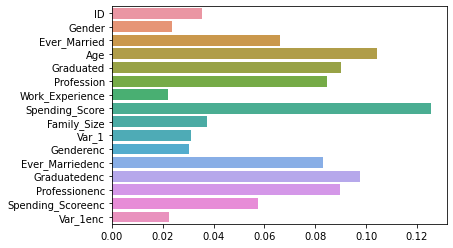

In [42]:
sns.barplot(x=model.feature_importances_,y=feature.columns)

## Blending
Giving less public score than the xgb without blending

In [86]:
def fitpredict(estimator):
    estimator.fit(feature,label)
    return estimator.predict_proba(feature)
df=pd.DataFrame(index=list(range(len(feature))))

In [87]:
df=df.join(pd.DataFrame(fitpredict(lgb)).add_suffix('xgb'))
df=df.join(pd.DataFrame(fitpredict(rf)).add_suffix('rf'))
df=df.join(pd.DataFrame(fitpredict(svm)).add_suffix('svm'))
df=df.join(pd.DataFrame(fitpredict(knn)).add_suffix('knn'))

In [88]:
df.shape

(8068, 16)

In [89]:
df.head()

,0xgb,1xgb,2xgb,3xgb,0rf,1rf,2rf,3rf,0svm,1svm,2svm,3svm,0knn,1knn,2knn,3knn
0,0.001769,0.011771,0.008847,0.977613,0.00,0.00,0.00,1.00,0.252644,0.224701,0.246032,0.276623,0.0,0.2,0.6,0.2
1,0.294098,0.431751,0.115215,0.158936,0.67,0.21,0.10,0.02,0.256403,0.225728,0.246117,0.271752,0.2,0.0,0.0,0.8
2,0.263589,0.642408,0.052652,0.041351,0.12,0.86,0.01,0.01,0.187423,0.227463,0.251808,0.333307,0.0,0.6,0.4,0.0
3,0.171201,0.287844,0.502821,0.038133,0.01,0.92,0.07,0.00,0.273000,0.229873,0.247437,0.249689,0.0,0.8,0.2,0.0
4,0.243933,0.528464,0.084538,0.143065,0.80,0.11,0.05,0.04,0.255990,0.225720,0.246101,0.272189,0.4,0.4,0.2,0.0


In [90]:
modelblend=xgb
modelblend.fit(df,label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
def fitpredict(estimator):
    estimator.fit(feature,label)
    return estimator.predict_proba(test.join(encodedt.add_suffix('enc'))[feature.columns])
dft=pd.DataFrame(index=list(range(len(test))))

In [92]:
dft=dft.join(pd.DataFrame(fitpredict(lgb)).add_suffix('xgb'))
dft=dft.join(pd.DataFrame(fitpredict(rf)).add_suffix('rf'))
dft=dft.join(pd.DataFrame(fitpredict(svm)).add_suffix('svm'))
dft=dft.join(pd.DataFrame(fitpredict(knn)).add_suffix('knn'))

In [93]:
dft.shape,test.shape

((2627, 16), (2627, 12))

## Final prediction

In [38]:
final_pred=model.predict(test.join(encodedt.add_suffix('enc'))[feature.columns])
#final_pred=modelblend.predict(dft)

In [39]:
pd.Series(final_pred).value_counts()/len(final_pred)*100

D    30.376856
A    27.217358
C    23.220404
B    19.185383
dtype: float64

In [40]:
t=pd.read_csv(r'D:\Downloads\CUSTOMER SEGMENTATIOn\test.csv')
submission=t[['ID']]
submission['Segmentation']=final_pred

## Taking segmentation from trainset for common IDS

In [97]:
common_id=np.intersect1d(train.ID,test.ID)

In [98]:
submission.set_index('ID',inplace=True)

In [99]:
submission.loc[common_id,'Segmentation']=np.array(train.set_index('ID').loc[common_id,'Segmentation'])

In [100]:
submission.reset_index(inplace=True)

In [41]:
submission.to_csv(r'C:\Users\pankaj\Desktop\customer segmentation\finaltouch.csv',index=False)

## Finding similer data in train set for uncommon instance's ID.
found aprox 190 instance just by droping a column

In [48]:
test['idx']=test.ID

In [49]:
id=set(test.ID)-set(train.ID)

In [50]:
test.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'idx'],
      dtype='object')

In [51]:
dl=['ID','idx','Var_1']

In [52]:
_=train.drop('ID',axis=1).merge(test.set_index('ID').loc[id],on=list(test.columns.drop(dl))).dropna()[['idx','Segmentation']]

In [53]:
submission.set_index('ID',inplace=True)

In [54]:
submission.loc[_.idx].Segmentation=_.Segmentation

In [55]:
submission.reset_index('ID',inplace=True)

In [56]:
submission.head()

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,C
